In [1]:
import pandas as pd
import numpy as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [2]:
import os

In [3]:
os.getcwd()

'c:\\Users\\ELCOT\\Desktop\\project'

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('C:\\Users\\ELCOT\\Desktop\\project\\data\lone_prediction.csv')

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
data.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [9]:
data.shape

(614, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
#replasing + with space for filling the non value
data['Dependents']=data['Dependents'].str.replace('+','')
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])
#data['LoanAmount'].fillna(value = data'LoanAmount'].mean(), implace = Ture)


In [13]:
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64') 
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64') 
data['Credit_History']=data['Credit_History'].astype('int64')




In [14]:
from imblearn.combine import SMOTETomek

In [15]:
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'],axis=1)

In [16]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.00000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,145.465798,342.410423,0.855049
std,6109.041673,2926.24876,84.180967,64.428629,0.352339
min,150.000000,0.00000,9.000000,12.000000,0.000000
25%,2877.500000,0.00000,100.250000,360.000000,1.000000
50%,3812.500000,1188.50000,125.000000,360.000000,1.000000
75%,5795.000000,2297.25000,164.750000,360.000000,1.000000
max,81000.000000,41667.00000,700.000000,480.000000,1.000000


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_11036\1238407493.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='r')
C:\Users\ELCOT\AppData\Local\Temp\ipykernel_11036\1238407493.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


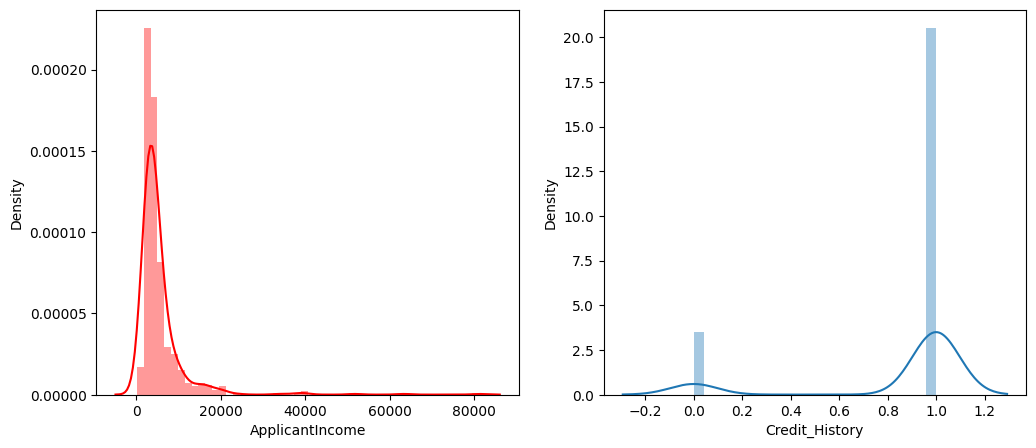

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()


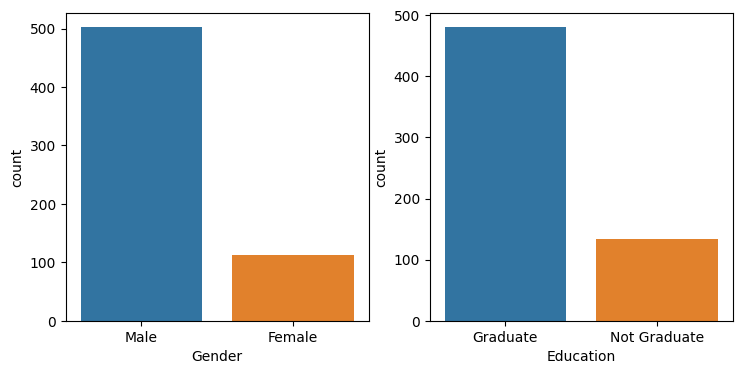

In [18]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(x = data['Gender'])
plt.subplot(1,4,2)
sns.countplot(x = data['Education'])
plt.show()


<Axes: xlabel='Property_Area', ylabel='count'>

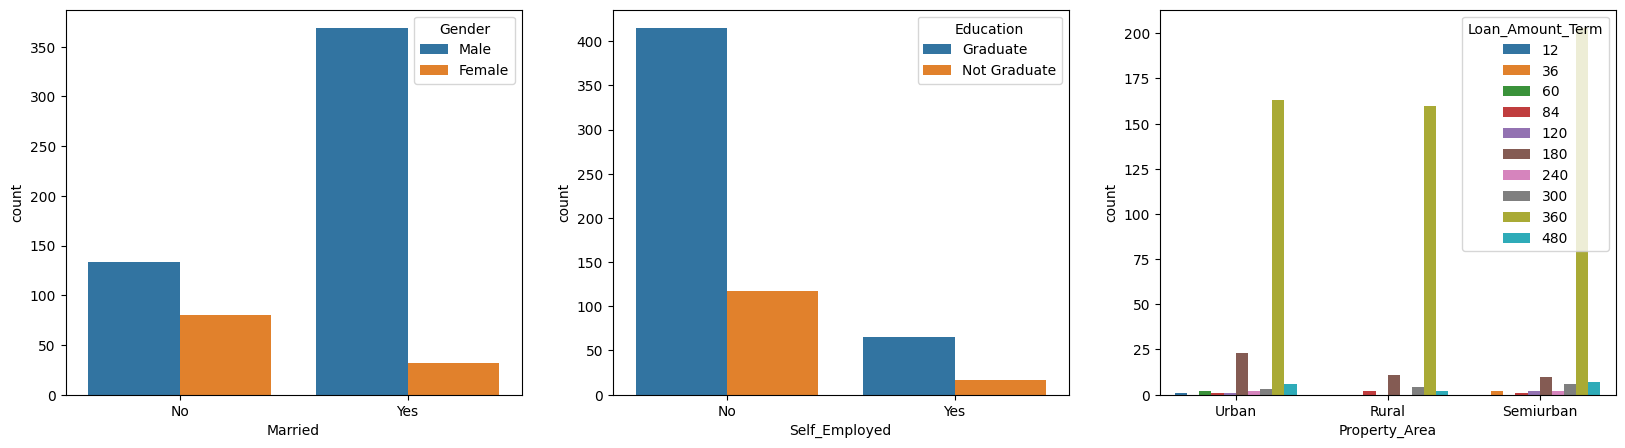

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x = data['Married'], hue=data['Gender'])
plt.subplot(132)
sns.countplot(x = data['Self_Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(x = data['Property_Area'], hue=data['Loan_Amount_Term'])


C:\Users\ELCOT\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

C:\Users\ELCOT\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ELCOT\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


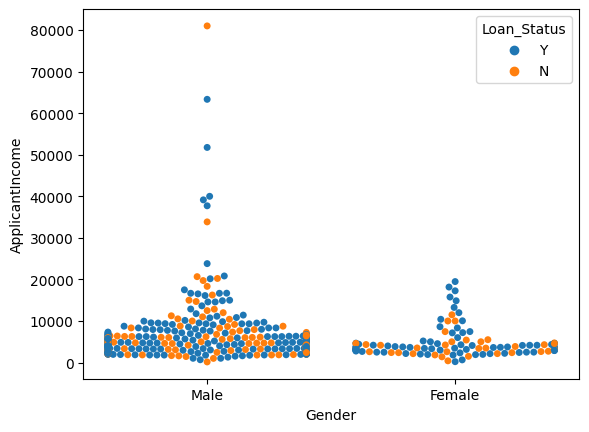

In [20]:
sns.swarmplot(x=data['Gender'],y=data['ApplicantIncome'], hue = data['Loan_Status'])

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in col:
    data[i] = le.fit_transform(data[i])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0,120,360,1,2,1
1,LP001003,1,1,1,0,0,4583,1508,128,360,1,0,0
2,LP001005,1,1,0,0,1,3000,0,66,360,1,2,1
3,LP001006,1,1,0,1,0,2583,2358,120,360,1,2,1
4,LP001008,1,0,0,0,0,6000,0,141,360,1,2,1


In [22]:
x = data.loc[:,'Gender':'Property_Area'].values
y = data.loc[:,'Loan_Status'].values

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x)
X_test = sc.fit_transform(X_train)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x,y,test_size=0.2, random_state=42)


In [25]:
from  sklearn.tree import DecisionTreeClassifier 
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test) 
    print('***Decision TreeClassifier***')
    print('Confusion matrix') 
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))


In [26]:
def randomForest(x_train, x_test, y_train, y_test):
    rf=RandomForestClassifier() 
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [27]:
def KNN (x_train, x_test, y_train, y_test): 
    knn=KNeighborsClassifier() 
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [28]:
def xgboost(x_train, x_test, y_train, y_test):
    xg=GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred=xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))



In [29]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units=100, activation='relu', input_dim=11))

In [ ]:
classifier.add(Dense(units=50, activation='relu'))

In [ ]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
model_history = classifier.fit(X_train, Y_train, batch_size=100, validation_split=0.2, epochs=100)

Epoch 1/100
4/4 [==============================] - 11s 374ms/step - loss: 49.4345 - accuracy: 0.5488 - val_loss: 9.1001 - val_accuracy: 0.6627
Epoch 2/100
4/4 [==============================] - 0s 41ms/step - loss: 21.6716 - accuracy: 0.6372 - val_loss: 21.5124 - val_accuracy: 0.5422
Epoch 3/100
4/4 [==============================] - 0s 46ms/step - loss: 25.9216 - accuracy: 0.5610 - val_loss: 12.3342 - val_accuracy: 0.7470
Epoch 4/100
4/4 [==============================] - 0s 39ms/step - loss: 18.5101 - accuracy: 0.6159 - val_loss: 8.5661 - val_accuracy: 0.4940
Epoch 5/100
4/4 [==============================] - 0s 44ms/step - loss: 12.7316 - accuracy: 0.6189 - val_loss: 8.6756 - val_accuracy: 0.7349
Epoch 6/100
4/4 [==============================] - 0s 67ms/step - loss: 10.6210 - accuracy: 0.6159 - val_loss: 4.4099 - val_accuracy: 0.6265
Epoch 7/100
4/4 [==============================] - 0s 39ms/step - loss: 9.3537 - accuracy: 0.6616 - val_loss: 7.6018 - val_accuracy: 0.4699
Epoch 8/10

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt.predict([[1,1,0,1,1,4276,1542,145,240,0,1]])

array([0])

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
rf.predict([[1,1,0,1,1,4276,1542,145,240,0,1]])

array([0])

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn.predict([[1,1,0,1,1,4276,1542,145,240,0,1]])

array([1])

In [ ]:
xg=GradientBoostingClassifier()
xg.fit(X_train,Y_train)
xg.predict([[1,1,0,1,1,4276,1542,145,240,0,1]])

array([0])

In [ ]:
classifier.save("lone.h5")

In [ ]:
y_pred = classifier.predict(X_test)

7/7 [==============================] - 1s 10ms/step


In [ ]:
y_pred

array([[7.24551380e-01],
       [8.38678718e-01],
       [9.70897794e-01],
       [3.89631428e-02],
       [2.27008555e-02],
       [9.99998987e-01],
       [6.96030140e-01],
       [2.33943500e-02],
       [1.64226373e-03],
       [1.00000000e+00],
       [1.72680825e-01],
       [6.75692805e-04],
       [3.84806544e-02],
       [7.39810348e-01],
       [9.99992847e-01],
       [9.99998868e-01],
       [7.42874946e-03],
       [1.44711941e-01],
       [8.94133758e-04],
       [3.24655980e-01],
       [1.82354569e-01],
       [9.40890022e-05],
       [5.71412563e-01],
       [8.81656229e-01],
       [5.22652299e-05],
       [9.31624985e-11],
       [9.99998569e-01],
       [6.16839409e-01],
       [7.74476111e-01],
       [2.60172069e-01],
       [5.88548720e-01],
       [1.00000000e+00],
       [1.80283515e-03],
       [9.93689597e-01],
       [9.50419426e-01],
       [9.32250261e-01],
       [4.43030061e-04],
       [6.05763555e-01],
       [7.11555004e-01],
       [1.00000000e+00],


In [ ]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

In [ ]:
def predict_exit(sample_value):
    sample_value = np.array(sample_value)
    sample_value = sample_value.reshape(1,-1)
    sample_value = sc.transform(sample_value)
    return classifier.predict(sample_value)

In [ ]:
import numpy as np
import tensorflow
sample_value = [[1,0,1,1,3,45,14,45,240,1,1]]
if predict_exit(sample_value)>0.5:
    print('Prediction: High chance of Loan Approvall')
else:
    print('Prediction: low chance of Loan Approval.')

1/1 [==============================] - 0s 465ms/step
Prediction: High chance of Loan Approvall


In [ ]:
def compareModel(X_train,X_test,Y_train,Y_test):
    decisionTree(X_train, X_test, Y_train, Y_test)
    print('-'*100)
    randomForest(X_train, X_test, Y_train, Y_test)
    print('-'*100)
    KNN(X_train,X_test,Y_train,Y_test)
    print('-'*100)
    xgboost(X_train, X_test, Y_train, Y_test)
    print('-'*100)
    

In [ ]:
compareModel(X_train,X_test,Y_train,Y_test)


***Decision TreeClassifier***
Confusion matrix
[[ 34  38]
 [ 27 104]]
Classification report
              precision    recall  f1-score   support

           0       0.56      0.47      0.51        72
           1       0.73      0.79      0.76       131

    accuracy                           0.68       203
   macro avg       0.64      0.63      0.64       203
weighted avg       0.67      0.68      0.67       203

----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[ 36  36]
 [  8 123]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.50      0.62        72
           1       0.77      0.94      0.85       131

    accuracy                           0.78       203
   macro avg       0.80      0.72      0.73       203
weighted avg       0.79      0.78      0.77       203

--------------------------------------------------------------

In [ ]:
ypred = classifier.predict(X_test)
print(accuracy_score(y_pred,Y_test))
print("ANN Model")
print("Confusion_Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Classification Report")
print(classification_report(Y_test,y_pred))

7/7 [==============================] - 0s 4ms/step
0.4827586206896552
ANN Model
Confusion_Matrix
[[43 29]
 [76 55]]
Classification Report
              precision    recall  f1-score   support

           0       0.36      0.60      0.45        72
           1       0.65      0.42      0.51       131

    accuracy                           0.48       203
   macro avg       0.51      0.51      0.48       203
weighted avg       0.55      0.48      0.49       203



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
yPred = rf.predict(X_test)

In [ ]:
f1_score(y_pred,Y_test,average='weighted')

0.4756546601896909

In [ ]:
cv = cross_val_score(rf,x,y,cv=5)


In [ ]:
np.mean(cv)

0.7784886045581768

In [ ]:
model=randomForest
pickle.dump(model,open('rdf.pk1','wb'))

In [ ]:
1

1